# Optimise pruning parameters

This Notebook shows how to optimise the pruning parameters of your network based on pairwise connectivity data.

First we need to create a small network that we can use for the optimisation of the pruning parameters.

In this example we do not need to have realistic neuron densities, so we will place the neurons in a cube of diameter 150 micrometers.

In [1]:
import os
import numpy as np

n_neurons = 150

pop_size = 15
# epochs = 10

pre_type = "dSPN"     # "iSPN"
post_type = "iSPN"  # "iSPN"
con_type = "GABA"

avg_num_synapses_per_pair = 3  # Expected mean, error weight

num_params = 3
distance_dependent_pruning = False


SPN2SPNdistDepPruning = "1-exp(-(0.4*d/60e-6)**2)"
FS_dist_dep_pruning = "exp(-(0.5*d/60e-6)**2)" 


extra_pruning_parameters = { }

if distance_dependent_pruning:
    if pre_type == "FS" and (post_type == "dSPN" or post_type == "iSPN"):
        extra_pruning_parameters = { 'distPruning': FS_dist_dep_pruning }
    elif "SPN" in pre_type and "SPN" in post_type:
        extra_pruning_parameters = { 'distPruning': SPN2SPNdistDepPruning }
    else:
        # No distance dependent pruning available for this neuron type, set it to False
        distance_dependent_pruning = False
        
dd_str = "_dd" if distance_dependent_pruning else ""
network_path = os.path.join("networks", f"{pre_type}_to_{post_type}_np{num_params}{dd_str}")

        
all_experimental_data = {}
all_experimental_data["dSPN", "iSPN"] = [(0, 50e-6, 3/47.0), (0, 100e-6, 3/66.0)]
all_experimental_data["dSPN", "dSPN"] = [(0, 50e-6, 5/19.0), (0, 100e-6, 3/43.0)]
all_experimental_data["iSPN", "iSPN"] = [(0, 50e-6, 14/39.0), (0, 100e-6, 7/31.0)]
all_experimental_data["iSPN", "dSPN"] = [(0, 50e-6, 13/47.0), (0, 100e-6, 10/80.0)]
all_experimental_data["FS", "FS"] = [(0, 250e-6, 7/12.0)]
all_experimental_data["FS", "iSPN"] = [(0, 100e-6, 6/9.0), (0, 150e-6, 21/54.0), (0, 250e-6, 27/77.0)]
all_experimental_data["FS", "dSPN"] = [(0, 100e-6, 8/9.0), (0, 150e-6, 29/48.0), (0, 250e-6, 48/90.0)]

experimental_data = all_experimental_data[pre_type, post_type]

cube_side = 1.5*np.max([x[1] for x in experimental_data])



In [2]:
from snudda.place.create_cube_mesh import create_cube_mesh

mesh_file = os.path.join(network_path, "cube-mesh.obj")
create_cube_mesh(mesh_file, [0,0,0], cube_side)

from snudda.init import SnuddaInit
si = SnuddaInit(network_path=network_path, random_seed=123, snudda_data="../../../../BasalGangliaData/data/")

si.define_structure(struct_name="Cube", struct_mesh=mesh_file, d_min=12e-6, mesh_bin_width=25e-6)

if pre_type == post_type:
    si.add_neurons(name=pre_type, num_neurons=n_neurons, volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum",pre_type.lower()))
else:
    si.add_neurons(name=pre_type, num_neurons=int(n_neurons/2), volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum", pre_type.lower()))
    si.add_neurons(name=post_type, num_neurons=int(n_neurons/2), volume_id="Cube",
                    neuron_dir=os.path.join("$DATA","neurons","striatum", post_type.lower()))
    

# The parameters here does not matter, they will be set during optimisation
si.add_neuron_target(neuron_name=pre_type,
                     target_name=post_type,
                     connection_type=con_type,
                     dist_pruning=None,
                     f1=None, soft_max=None, mu2=None,
                     a3=None,
                     conductance=[0.24e-9, 0.1e-9],
                     mod_file="tmGabaA")

si.write_json()

Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
Writing networks/dSPN_to_iSPN_np3/network-config.json


In [3]:
from snudda import SnuddaPlace
sp = SnuddaPlace(network_path=network_path, verbose=False)
sp.place()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/dSPN_to_iSPN_np3/network-config.json


Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/dSPN_to_iSPN_np3/network-config.json


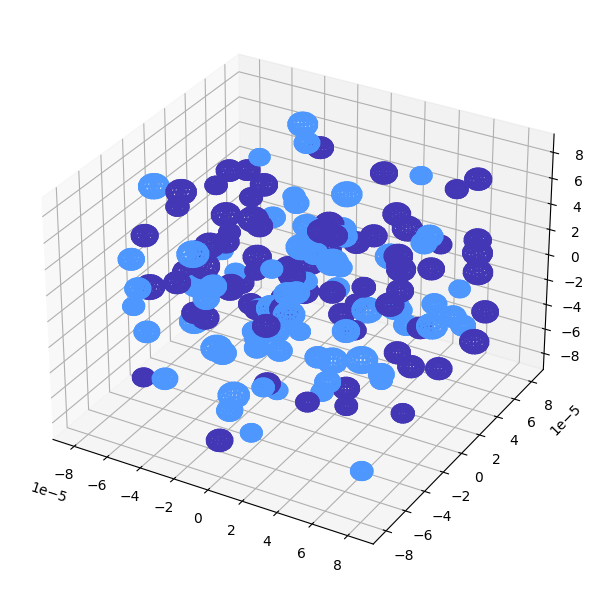

In [4]:
from snudda.plotting import PlotNetwork
network_file = os.path.join(network_path, "network-neuron-positions.hdf5")
pn = PlotNetwork(network_file)
pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False)
pn.close() 

In [5]:
from snudda import SnuddaDetect

sd = SnuddaDetect(network_path=network_path, hyper_voxel_size=100)
sd.detect()

Reading SNUDDA_DATA=../../../../BasalGangliaData/data/ from networks/dSPN_to_iSPN_np3/network-config.json
No d_view specified, running distribute neurons in serial
Processing hyper voxel : 31/125 (150 neurons)
Processing hyper voxel : 36/125 (149 neurons)
Processing hyper voxel : 56/125 (131 neurons)
Processing hyper voxel : 32/125 (117 neurons)
Processing hyper voxel : 61/125 (111 neurons)
Processing hyper voxel : 30/125 (100 neurons)
Processing hyper voxel : 37/125 (94 neurons)
Processing hyper voxel : 35/125 (93 neurons)
Processing hyper voxel : 6/125 (92 neurons)
Processing hyper voxel : 11/125 (78 neurons)
Processing hyper voxel : 57/125 (55 neurons)
Processing hyper voxel : 62/125 (50 neurons)
Processing hyper voxel : 26/125 (46 neurons)
Processing hyper voxel : 55/125 (46 neurons)
Processing hyper voxel : 60/125 (37 neurons)
Processing hyper voxel : 7/125 (35 neurons)
Processing hyper voxel : 5/125 (26 neurons)
Processing hyper voxel : 12/125 (25 neurons)
Processing hyper voxel 

In [6]:
from snudda.optimise.optimise_pruning import OptimisePruning
op = OptimisePruning(network_path=network_path)

In [7]:
op.merge_putative_synapses(force_merge=True)

Read 48895 out of total 48895 synapses


In [8]:
op.prune.connectivity_distributions

{(2,
  1,
  10): (OrderedDict([('f1', 1.0),
               ('softMax', None),
               ('mu2', None),
               ('a3', None),
               ('distPruning', None),
               ('cluster', False)]), None)}

In [9]:
op.prune.type_id_lookup

{'iSPN': 1, 'dSPN': 2}

In [10]:
op.prune.hist_file["meta/connectivityDistributions"][()]

b'{"dSPN$$iSPN": {"GABA": {"conductance": [2.4e-10, 1e-10], "channelParameters": {"modFile": "tmGabaA"}, "clusterSize": 1, "clusterSpread": null, "pruning": {"f1": null, "softMax": null, "mu2": null, "a3": null, "distPruning": null, "cluster": false}, "channelModelID": 10, "lognormal_mu_sigma": [-22.230424900260093, 0.40010675493807013]}}}'

In [11]:
res = op.optimize(pre_type=pre_type, post_type=post_type, con_type=con_type, 
                  experimental_data=experimental_data, 
                  avg_num_synapses_per_pair=avg_num_synapses_per_pair,
                  extra_pruning_parameters=extra_pruning_parameters, 
                  workers=8, maxiter=1000, pop_size=pop_size, tol=0.00001, num_params=num_params)

/home/hjorth/HBP/Snudda/venv/lib/python3.9/site-packages/scipy/optimize/_differentialevolution.py:377: UserWarning: differential_evolution: the 'workers' keyword has overridden updating='immediate' to updating='deferred'
  with DifferentialEvolutionSolver(func, bounds, args=args,


Worker iter: 100, fitness 1.4574409263465522
Worker iter: 100, fitness 1.3238748202677306
Worker iter: 100, fitness 1.1985332808989893
Worker iter: 100, fitness 1.2723292391453267
Worker iter: 100, fitness 1.22303527594717Worker iter: 100, fitness 1.276189931487764

Worker iter: 100, fitness 1.2651893400724532
Worker iter: 100, fitness 1.2571259511940671
Worker iter: 200, fitness 1.1152199973463746
Worker iter: 200, fitness 1.0987728037090043
Worker iter: 200, fitness 1.1095334149500884
Worker iter: 200, fitness 1.0987728037090043
Worker iter: 200, fitness 1.1095334149500884
Worker iter: 200, fitness 1.0987728037090043
Worker iter: 200, fitness 1.0987728037090043
Worker iter: 200, fitness 1.0987728037090043
Duration: 60.235286417999305 s


# Best parameter set

In [12]:
if num_params == 1:
    param_str = f"f1 = %.4f" % (res.x[0])
elif num_params == 2:
    param_str = f"f1 = %.4f, mu2 = %.4f" % (res.x[0], res.x[1])
elif num_params == 3:
    param_str = f"f1 = %.4f, mu2 = %.4f, a3 = %.4f" % (res.x[0], res.x[1], res.x[2])
elif num_params == 4:
    param_str = f"f1 = %.4f, softMax = %.4f, mu2 = %.4f, a3 = %,4f" % (res.x[0], res.x[1], res.x[2], res.x[3])
else:
    param_str = res.x
    
if "distPruning" in extra_pruning_parameters:
   param_str += f" ({extra_pruning_parameters['distPruning']})"                                                  
                                                 
print(param_str)

f1 = 0.1037, mu2 = 2.0754, a3 = 0.2142


In [13]:
res

     fun: 1.0987728037090043
 message: 'Optimization terminated successfully.'
    nfev: 1894
     nit: 62
 success: True
       x: array([0.1037178 , 2.07540564, 0.21419271])

In [14]:
import os
from snudda.analyse.analyse import SnuddaAnalyse
import glob

# Get the last file
# list_of_files = glob.glob(os.path.join(network_path, "temp", "network-synapses-*hdf5"))
# network_file = max(list_of_files, key=os.path.getctime)

network_file = os.path.join(network_path, "network-synapses.hdf5")

dist3D = False
y_max_H = None

sa = SnuddaAnalyse(network_file)

Assuming volume type: cube [cube or full]
Only using 20000 neurons of the connection data
Number of neurons: 150
Synapse row 0 - 0.0 % time: 0.0010521689837332815 seconds
Created connection matrix 0.0016909189871512353 seconds
Created gap junction connection matrix 0.0006864180031698197 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
n_synapses = 536, at 0
Created distance histogram (optimised) in 0.0011844179825857282 seconds
Saving cache to networks/dSPN_to_iSPN_np3/network-synapses.hdf5-cache


Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 75/75
Counting connections
Requested: 10000000.0 calculated [5625.]
P(d<5e-05) = 0.057608695652173914
P(d<0.0001) = 0.038393084159674545


/home/hjorth/HBP/Snudda/snudda/analyse/analyse.py:1394: RuntimeWarning: invalid value encountered in divide
  p_con = np.divide(count_con, count_all)


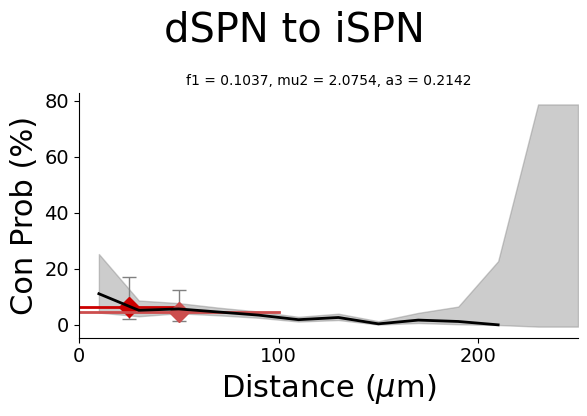

Wrote networks/dSPN_to_iSPN_np3/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-3D-dist.png
Plotting number of connections
Only analysing centre post synaptic neurons, sideLen = 0.00025
Centering in None : Keeping 75/75
Calculating max synapses
Calculating mean synapses
Plotting 179 connections


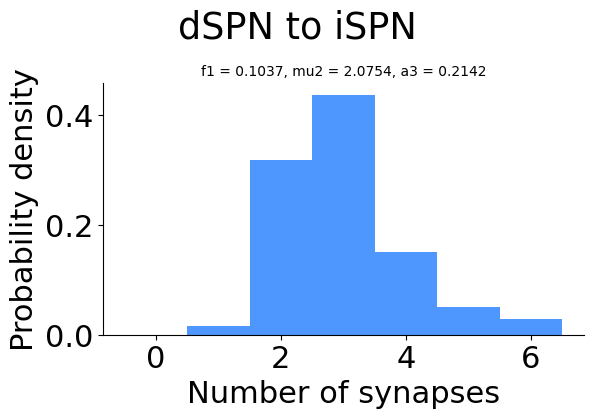

Wrote networks/dSPN_to_iSPN_np3/figures/Network-number-of-synapses-from-dSPN-to-iSPN-per-cell.png


In [15]:
if pre_type == "dSPN" and post_type == "iSPN":
    sa.plot_connection_probability("dSPN", "iSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(3, 47), (3, 66)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("dSPN", "iSPN", sub_title=param_str)
elif pre_type == "dSPN" and post_type == "dSPN":
    sa.plot_connection_probability("dSPN", "dSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(5, 19), (3, 43)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("dSPN", "dSPN", sub_title=param_str)
elif pre_type == "iSPN" and post_type == "iSPN":
    sa.plot_connection_probability("iSPN", "iSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(14, 39), (7, 31)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("iSPN", "iSPN", sub_title=param_str)
elif pre_type == "iSPN" and post_type == "dSPN":
    sa.plot_connection_probability("iSPN", "dSPN", dist_3d=True, exp_max_dist=[50e-6, 100e-6], exp_data_detailed=[(13, 47), (10, 80)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("iSPN", "dSPN", sub_title=param_str)
elif pre_type == "FS" and post_type == "FS":
    sa.plot_connection_probability("FS", "FS", dist_3d=True, exp_max_dist=[250e-6], exp_data_detailed=[(7, 12)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("FS", "FS", sub_title=param_str)
elif pre_type == "FS" and post_type == "iSPN":
    sa.plot_connection_probability("FS", "iSPN", dist_3d=True, exp_max_dist=[100e-6, 150e-6, 250e-6], exp_data_detailed=[(6, 9), (21, 54), (27,77)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("FS", "iSPN", sub_title=param_str)
elif pre_type == "FS" and post_type == "dSPN":
    sa.plot_connection_probability("FS", "dSPN", dist_3d=True, exp_max_dist=[100e-6, 150e-6, 250e-6], exp_data_detailed=[(8, 9), (29, 48), (48,90)], sub_title=param_str)
    sa.plot_num_synapses_per_pair("FS", "dSPN", sub_title=param_str)